In [1]:
# Import Dependencies
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading: 100%|██████████| 6.46M/6.46M [00:00<00:00, 7.79MB/s]


In [3]:
#2 Visit the Mars NASA news site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [4]:
html = browser.html
news_soup = soup(html, 'html.parser')
table = news_soup.find_all('table', class_='table')

In [5]:
#3 Extract table from URL source
mars_temp = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html', index_col=0)

In [6]:
#3 Preview scraped table
mars_temp

[     terrestrial_date   sol   ls  month  min_temp  pressure
 id                                                         
 2          2012-08-16    10  155      6     -75.0     739.0
 13         2012-08-17    11  156      6     -76.0     740.0
 24         2012-08-18    12  156      6     -76.0     741.0
 35         2012-08-19    13  157      6     -74.0     732.0
 46         2012-08-20    14  157      6     -74.0     740.0
 ...               ...   ...  ...    ...       ...       ...
 1889       2018-02-23  1973  133      5     -78.0     730.0
 1892       2018-02-24  1974  134      5     -77.0     729.0
 1894       2018-02-25  1975  134      5     -76.0     729.0
 1893       2018-02-26  1976  135      5     -77.0     728.0
 1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 6 columns]]

In [7]:
#4 Convert scraped table into dataframe
mars_temps = pd.concat(mars_temp)

In [8]:
#4 preview dataframe
mars_temps

,terrestrial_date,sol,ls,month,min_temp,pressure
id,,,,,,
2,2012-08-16,10,155,6,-75.0,739.0
13,2012-08-17,11,156,6,-76.0,740.0
24,2012-08-18,12,156,6,-76.0,741.0
35,2012-08-19,13,157,6,-74.0,732.0
46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...
1889,2018-02-23,1973,133,5,-78.0,730.0
1892,2018-02-24,1974,134,5,-77.0,729.0
1894,2018-02-25,1975,134,5,-76.0,729.0


In [9]:
#5 Verify data types in dataframe
mars_temps.dtypes

terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [10]:
#5 Convert 'terrestrial_date' to datetime data type
mars_temps['terrestrial_date'] = mars_temps['terrestrial_date'].apply(pd.to_datetime)

In [11]:
#5 Verify conversion was successful
mars_temps.dtypes

terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [12]:
#6 How many months exist on mars?
months = mars_temps['month'].max()
months

12

In [13]:
#7 How many Martian days worth of data exist in the scraped dataset?
martian_days_max = mars_temps['sol'].max()
martian_days_min = mars_temps['sol'].min()
martian_days = martian_days_max - martian_days_min
martian_days

1967

In [14]:
#8 What are the coldest and the warmest months on Mars (at the location of Curiosity)?
low_temps = mars_temps.groupby(mars_temps.month)['min_temp'].mean()
low_temps

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

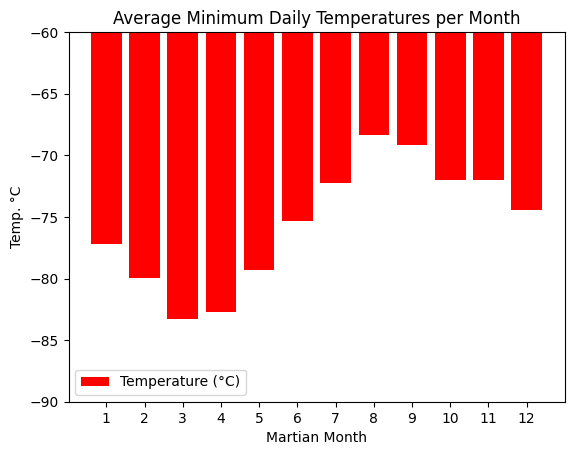

In [22]:
#8 What are the coldest and the warmest months on Mars (at the location of Curiosity)?
%matplotlib inline
x_axis = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]
y_axis = low_temps

plt.xlabel('Martian Month')
plt.ylabel('Temp. °C')
plt.title("Average Minimum Daily Temperatures per Month")
plt.bar(x_axis, y_axis, color="red", label="Temperature (°C)")
plt.ylim(-90, -60)
plt.legend()

#8 What are the coldest and the warmest months on Mars (at the location of Curiosity)?
The coldest month, as per the bar graph above, is the third month, whereas the warmest month is the eigth month.

In [17]:
#9 Which months have the lowest and the highest atmospheric pressure on Mars?
atm_pres = mars_temps.groupby(mars_temps.month)['pressure'].mean()
atm_pres

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

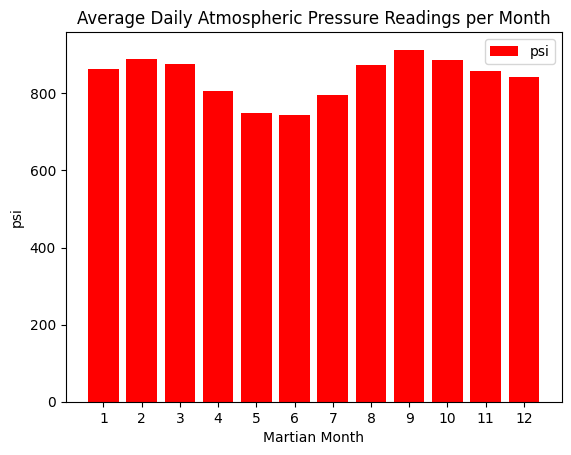

In [18]:
#9 Which months have the lowest and the highest atmospheric pressure on Mars?
x_axis = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]
y_axis = atm_pres

plt.xlabel('Martian Month')
plt.ylabel('psi')
plt.title("Average Daily Atmospheric Pressure Readings per Month")
plt.bar(x_axis, y_axis, color="red", label="psi")
plt.legend()

#9 Which months have the lowest and the highest atmospheric pressure on Mars?
The month, on Mars at Curiosity's location, that has the lowest atmospheric pressure would be the sixth month, and the month with the highest atmospheric pressure would be the ninth month. 

In [19]:
year = mars_temps.groupby(mars_temps.terrestrial_date.dt.year)['min_temp'].count()
year

terrestrial_date
2012    130
2013    290
2014    355
2015    340
2016    345
2017    351
2018     56
Name: min_temp, dtype: int64

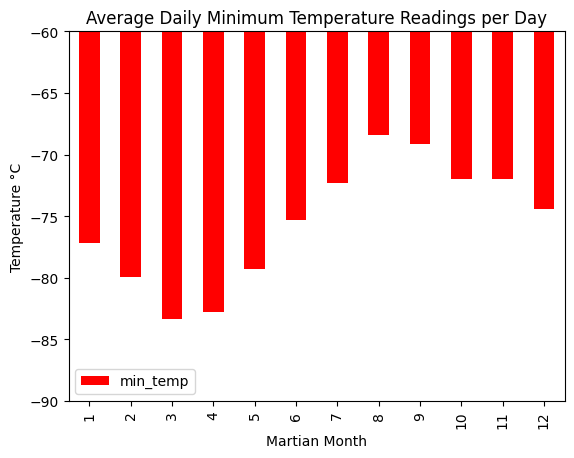

In [54]:
#10 About how many terrestrial (Earth) days exist in a Martian year?

low_temps.plot(color='red', kind="bar")
plt.xlabel('Martian Month')
plt.ylabel('Temperature °C')
plt.title("Average Daily Minimum Temperature Readings per Day")
plt.ylim(-90,-60)
plt.legend()

Assumin an average of 30 days per month, and seeing how there are 12 months in th year. I would estimate that there are 360 days in a Martian Year.

In [51]:
#11. Export the DataFrame to a CSV file.

mars_temps_csv = mars_temps.to_csv('mars_temps.csv')